In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from kneed import KneeLocator
sns.set()

D:\python\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


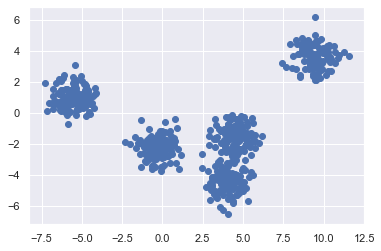

In [18]:
x1,y = make_blobs(n_samples=600, centers=5, cluster_std=0.7, random_state=123)
plt.scatter(x1[:,0], x1[:,1])

In [51]:
# in case minPts = 5
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x2)
distances, indices = nbrs.kneighbors(x2)

587


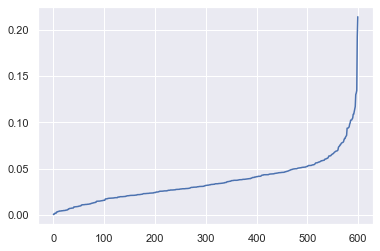

In [52]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
kn = KneeLocator(np.arange(0,600), distances, curve='convex', direction='increasing')
print(kn.knee)

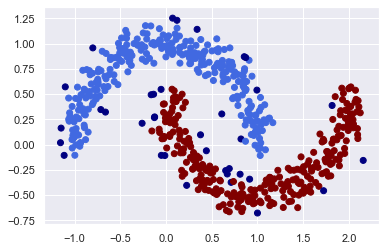

In [36]:
m = DBSCAN(eps=0.1,min_samples = 5)
m.fit(x2)
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(x2[:,0], x2[:,1], c=vectorizer(clusters))

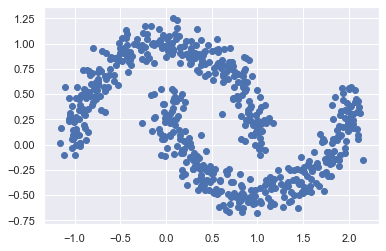

In [16]:
x2,y = make_moons(n_samples=600, noise=0.1)
plt.scatter(x2[:,0], x2[:,1])

In [55]:
import time

start = time.time()

a = 1
b = 1
c = a+b
%time print(c)

print(f'Time: {time.time() - start}')

2
Wall time: 968 µs
Time: 0.0009684562683105469


# Instrumentation

In [69]:
def func():
    j = []
    for i in np.arange(0,10):
        i += 1
        j.append(i)
    print(j)
    return ('func')

In [56]:
import instrument
from time import sleep

In [72]:
@instrument.function()
def func():
    j = []
    for i in np.arange(0,10):
        i += 1
        j.append(i)
    print(j)
    return ('func')
func()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
__main__.func: 1 items in 0.00 seconds


'func'

In [91]:
with instrument.block(name="slowcode"):
    j = []
    for i in np.arange(0,1000000):
        j.append(i)

slowcode: 1 items in 0.18 seconds


In [92]:
def math_is_hard(N):
    x = 0
    while x < N:
        sleep(.1)
        yield x * x
        x += 1

_ = instrument.each(math_is_hard(5))
# squares = list(_)

In [93]:
import timeit
import time
def long_function():
    print('function start')
    time.sleep(5)
    print('function end')
print(timeit.Timer(long_function).timeit(number=2))

function start
function end
function start
function end
10.000567900000533
